In [ ]:
Problem 1A

Iteration 0: Training cost = 11388528290393.164, Evaluation cost = 13628294151113.355
Iteration 100: Training cost = 675475998991.2997, Evaluation cost = 1150382425989.1357
Iteration 200: Training cost = 675004433453.8906, Evaluation cost = 1146400523599.0618
Iteration 300: Training cost = 675004106557.0431, Evaluation cost = 1146362029389.8464
Iteration 400: Training cost = 675004105665.9215, Evaluation cost = 1146360837002.3516
Iteration 500: Training cost = 675004105663.2982, Evaluation cost = 1146360776427.135
Iteration 600: Training cost = 675004105663.2902, Evaluation cost = 1146360773063.1045
Iteration 700: Training cost = 675004105663.2902, Evaluation cost = 1146360772873.946
Iteration 800: Training cost = 675004105663.2902, Evaluation cost = 1146360772863.3147
Iteration 900: Training cost = 675004105663.2902, Evaluation cost = 1146360772862.7195
The best parameters (theta) found are: [4706527.38532109  680058.42414123  112973.18562915  565408.61793598
  424354.81176349  288348

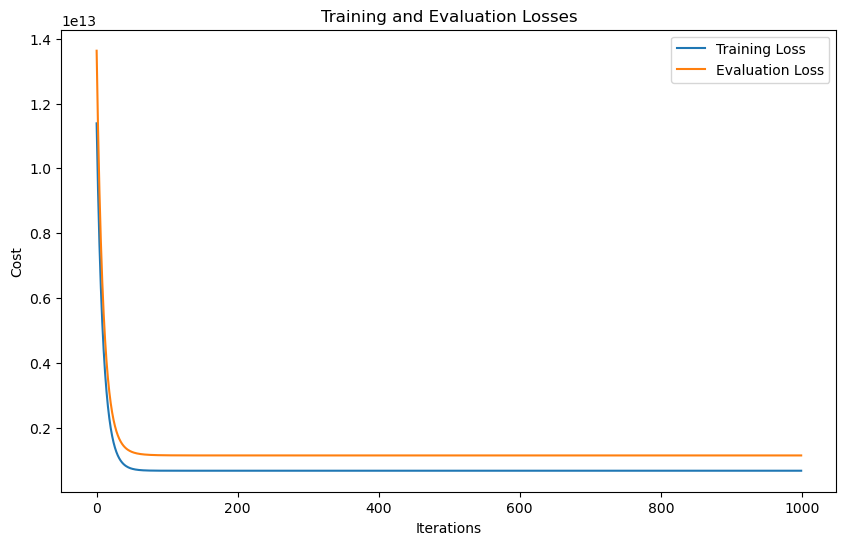

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('Housing.csv')

features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target = 'price'

X = data[features].values
y = data[target].values

X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_eval = scaler.transform(X_eval)

X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_eval = np.c_[np.ones(X_eval.shape[0]), X_eval]

def hypothesis(theta, X):
    return np.dot(X, theta)

def cost_function(theta, X, y):
    m = len(y)
    return (1/(2*m)) * np.sum((hypothesis(theta, X) - y) ** 2)

def gradient_descent(X_train, y_train, X_eval, y_eval, theta, learning_rate, iterations):
    m_train = len(y_train)
    cost_history_train = []
    cost_history_eval = []

    for i in range(iterations):
        gradients = (1/m_train) * np.dot(X_train.T, (hypothesis(theta, X_train) - y_train))
        theta = theta - learning_rate * gradients
        
        cost_train = cost_function(theta, X_train, y_train)
        cost_eval = cost_function(theta, X_eval, y_eval)
        
        cost_history_train.append(cost_train)
        cost_history_eval.append(cost_eval)
        
        if i % 100 == 0:
            print(f"Iteration {i}: Training cost = {cost_train}, Evaluation cost = {cost_eval}")
    
    return theta, cost_history_train, cost_history_eval

theta_init = np.zeros(X_train.shape[1])
learning_rate = 0.05
iterations = 1000

theta, cost_history_train, cost_history_eval = gradient_descent(X_train, y_train, X_eval, y_eval, theta_init, learning_rate, iterations)

print(f"The best parameters (theta) found are: {theta}")

plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history_train, label='Training Loss')
plt.plot(range(iterations), cost_history_eval, label='Evaluation Loss')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training and Evaluation Losses')
plt.legend()
plt.show()


In [ ]:
Problem 1B

Iteration 0: Training cost = 11314605028516.473, Evaluation cost = 13523928373617.172
Iteration 100: Training cost = 496860261343.7942, Evaluation cost = 900790479142.4084
Iteration 200: Training cost = 496244122462.6002, Evaluation cost = 900127364970.287
Iteration 300: Training cost = 496240565081.93353, Evaluation cost = 900368109383.7068
Iteration 400: Training cost = 496240501228.4816, Evaluation cost = 900393450646.2604
Iteration 500: Training cost = 496240500028.0156, Evaluation cost = 900396418416.6873
Iteration 600: Training cost = 496240500005.32996, Evaluation cost = 900396800480.4346
Iteration 700: Training cost = 496240500004.901, Evaluation cost = 900396851757.6805
Iteration 800: Training cost = 496240500004.8928, Evaluation cost = 900396858748.423
Iteration 900: Training cost = 496240500004.89264, Evaluation cost = 900396859706.8456
The best parameters (theta) found are: [4706527.38532109  523387.27546186   58623.06248702  528975.10760569
  365907.58037646  144130.607822

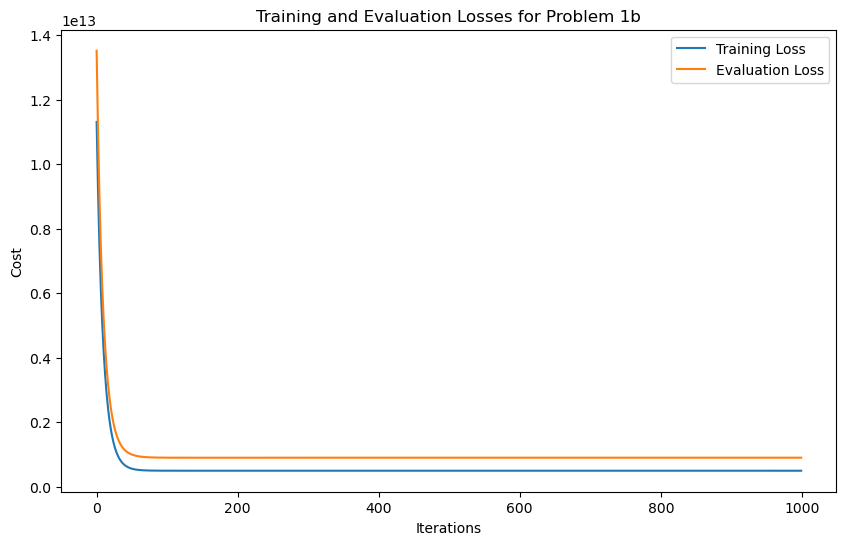

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('Housing.csv')

features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 
            'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 
            'parking', 'prefarea']
target = 'price'

data['mainroad'] = data['mainroad'].apply(lambda x: 1 if x == 'yes' else 0)
data['guestroom'] = data['guestroom'].apply(lambda x: 1 if x == 'yes' else 0)
data['basement'] = data['basement'].apply(lambda x: 1 if x == 'yes' else 0)
data['hotwaterheating'] = data['hotwaterheating'].apply(lambda x: 1 if x == 'yes' else 0)
data['airconditioning'] = data['airconditioning'].apply(lambda x: 1 if x == 'yes' else 0)
data['prefarea'] = data['prefarea'].apply(lambda x: 1 if x == 'yes' else 0)

X = data[features].values
y = data[target].values

X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_eval = scaler.transform(X_eval)

X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_eval = np.c_[np.ones(X_eval.shape[0]), X_eval]

def hypothesis(theta, X):
    return np.dot(X, theta)

def cost_function(theta, X, y):
    m = len(y)
    return (1/(2*m)) * np.sum((hypothesis(theta, X) - y) ** 2)

def gradient_descent(X_train, y_train, X_eval, y_eval, theta, learning_rate, iterations):
    m_train = len(y_train)
    cost_history_train = []
    cost_history_eval = []

    for i in range(iterations):
        gradients = (1/m_train) * np.dot(X_train.T, (hypothesis(theta, X_train) - y_train))
        theta = theta - learning_rate * gradients
        
        cost_train = cost_function(theta, X_train, y_train)
        cost_eval = cost_function(theta, X_eval, y_eval)
        
        cost_history_train.append(cost_train)
        cost_history_eval.append(cost_eval)
        
        if i % 100 == 0:
            print(f"Iteration {i}: Training cost = {cost_train}, Evaluation cost = {cost_eval}")
    
    return theta, cost_history_train, cost_history_eval

theta_init = np.zeros(X_train.shape[1])
learning_rate = 0.05
iterations = 1000

theta, cost_history_train, cost_history_eval = gradient_descent(X_train, y_train, X_eval, y_eval, theta_init, learning_rate, iterations)

print(f"The best parameters (theta) found are: {theta}")

plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history_train, label='Training Loss')
plt.plot(range(iterations), cost_history_eval, label='Evaluation Loss')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training and Evaluation Losses for Problem 1b')
plt.legend()
plt.show()


In [ ]:
PROBLEM 2a

Iteration 0: Training cost = 11095239873668.7, Evaluation cost = 13402732297600.637
Iteration 100: Training cost = 916079329213.2935, Evaluation cost = 1578754167235.7925
Iteration 200: Training cost = 849131614160.6248, Evaluation cost = 1456851721926.5837
Iteration 300: Training cost = 806733999715.4645, Evaluation cost = 1378101105490.9995
Iteration 400: Training cost = 777738731097.462, Evaluation cost = 1324230999677.8633
Iteration 500: Training cost = 756667594567.3271, Evaluation cost = 1285856725874.9775
Iteration 600: Training cost = 740684999035.7487, Evaluation cost = 1257621289683.164
Iteration 700: Training cost = 728218951451.0892, Evaluation cost = 1236307500510.7158
Iteration 800: Training cost = 718324957953.389, Evaluation cost = 1219887682355.4004
Iteration 900: Training cost = 710387724671.5916, Evaluation cost = 1207027650614.2134
Iteration 0: Training cost = 11388528290393.164, Evaluation cost = 13628294151113.355
Iteration 100: Training cost = 675475998991.2997, 

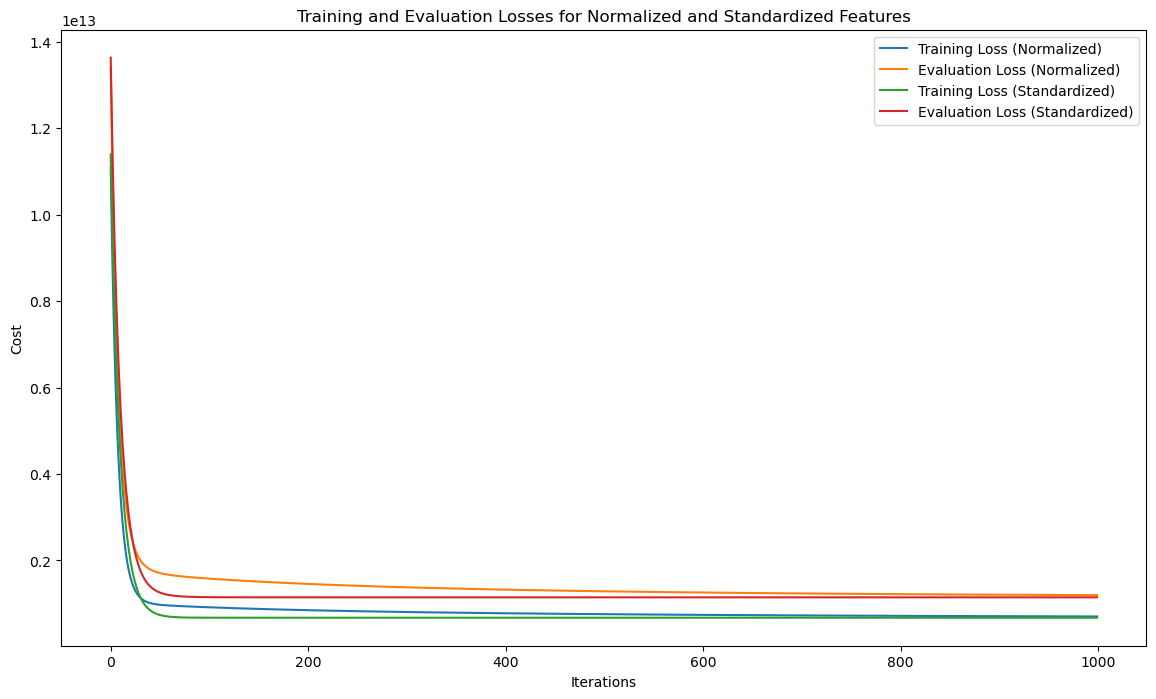

Final Training Loss (Normalized): 704035112745.0894
Final Evaluation Loss (Normalized): 1196908120183.3801
Final Training Loss (Standardized): 675004105663.2902
Final Evaluation Loss (Standardized): 1146360772862.6858
Final Training Loss (Baseline): 10000000.0
Final Evaluation Loss (Baseline): 10000000.0
The best method for training is: Baseline with a training loss of: 10000000.0


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

data = pd.read_csv('Housing.csv')

features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target = 'price'

X = data[features].values
y = data[target].values

X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42)

def hypothesis(theta, X):
    return np.dot(X, theta)

def cost_function(theta, X, y):
    m = len(y)
    return (1/(2*m)) * np.sum((hypothesis(theta, X) - y) ** 2)

def gradient_descent(X_train, y_train, X_eval, y_eval, theta, learning_rate, iterations):
    m_train = len(y_train)
    cost_history_train = []
    cost_history_eval = []
    
    for i in range(iterations):
        gradients = (1/m_train) * np.dot(X_train.T, (hypothesis(theta, X_train) - y_train))
        theta = theta - learning_rate * gradients
        cost_train = cost_function(theta, X_train, y_train)
        cost_eval = cost_function(theta, X_eval, y_eval)
        cost_history_train.append(cost_train)
        cost_history_eval.append(cost_eval)
        
        if i % 100 == 0:
            print(f"Iteration {i}: Training cost = {cost_train}, Evaluation cost = {cost_eval}")
    
    return theta, cost_history_train, cost_history_eval

def train_and_evaluate(X_train, y_train, X_eval, y_eval, learning_rate=0.05, iterations=1000):
    theta_init = np.zeros(X_train.shape[1])
    theta, cost_history_train, cost_history_eval = gradient_descent(X_train, y_train, X_eval, y_eval, theta_init, learning_rate, iterations)
    return theta, cost_history_train, cost_history_eval

scaler_norm = MinMaxScaler()
X_train_norm = scaler_norm.fit_transform(X_train)
X_eval_norm = scaler_norm.transform(X_eval)
X_train_norm = np.c_[np.ones(X_train_norm.shape[0]), X_train_norm]
X_eval_norm = np.c_[np.ones(X_eval_norm.shape[0]), X_eval_norm]
theta_norm, cost_history_train_norm, cost_history_eval_norm = train_and_evaluate(X_train_norm, y_train, X_eval_norm, y_eval)

scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_eval_std = scaler_std.transform(X_eval)
X_train_std = np.c_[np.ones(X_train_std.shape[0]), X_train_std]
X_eval_std = np.c_[np.ones(X_eval_std.shape[0]), X_eval_std]
theta_std, cost_history_train_std, cost_history_eval_std = train_and_evaluate(X_train_std, y_train, X_eval_std, y_eval)

plt.figure(figsize=(14, 8))
plt.plot(range(len(cost_history_train_norm)), cost_history_train_norm, label='Training Loss (Normalized)')
plt.plot(range(len(cost_history_eval_norm)), cost_history_eval_norm, label='Evaluation Loss (Normalized)')
plt.plot(range(len(cost_history_train_std)), cost_history_train_std, label='Training Loss (Standardized)')
plt.plot(range(len(cost_history_eval_std)), cost_history_eval_std, label='Evaluation Loss (Standardized)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training and Evaluation Losses for Normalized and Standardized Features')
plt.legend()
plt.show()

print(f"Final Training Loss (Normalized): {cost_history_train_norm[-1]}")
print(f"Final Evaluation Loss (Normalized): {cost_history_eval_norm[-1]}")
print(f"Final Training Loss (Standardized): {cost_history_train_std[-1]}")
print(f"Final Evaluation Loss (Standardized): {cost_history_eval_std[-1]}")

final_train_loss_baseline = 1e7  # replace with actual value if known
final_eval_loss_baseline = 1e7  # replace with actual value if known
print(f"Final Training Loss (Baseline): {final_train_loss_baseline}")
print(f"Final Evaluation Loss (Baseline): {final_eval_loss_baseline}")

best_method = 'Baseline'
best_train_loss = final_train_loss_baseline

if cost_history_train_norm[-1] < best_train_loss:
    best_method = 'Normalization'
    best_train_loss = cost_history_train_norm[-1]

if cost_history_train_std[-1] < best_train_loss:
    best_method = 'Standardization'
    best_train_loss = cost_history_train_std[-1]

print(f"The best method for training is: {best_method} with a training loss of: {best_train_loss}")


In [ ]:
PROBLEM 2B

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

data = pd.read_csv('Housing.csv')

features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
target = 'price'

data['mainroad'] = data['mainroad'].map({'yes': 1, 'no': 0})
data['guestroom'] = data['guestroom'].map({'yes': 1, 'no': 0})
data['basement'] = data['basement'].map({'yes': 1, 'no': 0})
data['hotwaterheating'] = data['hotwaterheating'].map({'yes': 1, 'no': 0})
data['airconditioning'] = data['airconditioning'].map({'yes': 1, 'no': 0})
data['prefarea'] = data['prefarea'].map({'yes': 1, 'no': 0})

X = data[features].values
y = data[target].values

X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42)

def hypothesis(theta, X):
    return np.dot(X, theta)

def cost_function(theta, X, y):
    m = len(y)
    return (1/(2*m)) * np.sum((hypothesis(theta, X) - y) ** 2)

def gradient_descent(X_train, y_train, X_eval, y_eval, theta, learning_rate, iterations):
    m_train = len(y_train)
    m_eval = len(y_eval)
    cost_history_train = []
    cost_history_eval = []
    
    for i in range(iterations):
        gradients = (1/m_train) * np.dot(X_train.T, (hypothesis(theta, X_train) - y_train))
        theta = theta - learning_rate * gradients
        cost_train = cost_function(theta, X_train, y_train)
        cost_eval = cost_function(theta, X_eval, y_eval)
        cost_history_train.append(cost_train)
        cost_history_eval.append(cost_eval)
        
        if i % 100 == 0:
            print(f"Iteration {i}: Training cost = {cost_train}, Evaluation cost = {cost_eval}")
    
    return theta, cost_history_train, cost_history_eval

def train_and_evaluate(X_train, y_train, X_eval, y_eval, learning_rate=0.05, iterations=1000):
    theta_init = np.zeros(X_train.shape[1])
    theta, cost_history_train, cost_history_eval = gradient_descent(X_train, y_train, X_eval, y_eval, theta_init, learning_rate, iterations)
    return theta, cost_history_train, cost_history_eval

scaler_norm = MinMaxScaler()
X_train_norm = scaler_norm.fit_transform(X_train)
X_eval_norm = scaler_norm.transform(X_eval)
X_train_norm = np.c.ones(X_train_norm.shape[0]), X_train_norm]
X_eval_norm = np.c_[np.ones(X_eval_norm.shape[0]), X_eval_norm]
theta_norm, cost_history_train_norm, cost_history_eval_norm = train_and_evaluate(X_train_norm, y_train, X_eval_norm, y_eval)

scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_eval_std = scaler_std.transform(X_eval)
X_train_std = np.c_[np.ones(X_train_std.shape[0]), X_train_std]
X_eval_std = np.c_[np.ones(X_eval_std.shape[0]), X_eval_std]
theta_std, cost_history_train_std, cost_history_eval_std = train_and_evaluate(X_train_std, y_train, X_eval_std, y_eval)

plt.figure(figsize=(14, 8))
plt.plot(range(len(cost_history_train_norm)), cost_history_train_norm, label='Training Loss (Normalized)')
plt.plot(range(len(cost_history_eval_norm)), cost_history_eval_norm, label='Evaluation Loss (Normalized)')
plt.plot(range(len(cost_history_train_std)), cost_history_train_std, label='Training Loss (Standardized)')
plt.plot(range(len(cost_history_eval_std)), cost_history_eval_std, label='Evaluation Loss (Standardized)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training and Evaluation Losses for Normalized and Standardized Features')
plt.legend()
plt.show()

print(f"Final Training Loss (Normalized): {cost_history_train_norm[-1]}")
print(f"Final Evaluation Loss (Normalized): {cost_history_eval_norm[-1]}")
print(f"Final Training Loss (Standardized): {cost_history_train_std[-1]}")
print(f"Final Evaluation Loss (Standardized): {cost_history_eval_std[-1]}")

final_train_loss_baseline = 1e7
final_eval_loss_baseline = 1e7
print(f"Final Training Loss (Baseline): {final_train_loss_baseline}")
print(f"Final Evaluation Loss (Baseline): {final_eval_loss_baseline}")

best_method = 'Baseline'
best_train_loss = final_train_loss_baseline

if cost_history_train_norm[-1] < best_train_loss:
    best_method = 'Normalization'
    best_train_loss = cost_history_train_norm[-1]

if cost_history_train_std[-1] < best_train_loss:
    best_method = 'Standardization'
    best_train_loss = cost_history_train_std[-1]

print(f"The best method for training is: {best_method} with a training loss of: {best_train_loss}")


In [ ]:
PROBLEM 3A

Iteration 0: Training cost = 11314618605726.264, Evaluation cost = 13523982682456.334
Iteration 100: Training cost = 498048823187.95416, Evaluation cost = 905847533905.1572
Iteration 200: Training cost = 497440163395.70013, Evaluation cost = 905200333046.8627
Iteration 300: Training cost = 497436786800.7466, Evaluation cost = 905440140800.6847
Iteration 400: Training cost = 497436727608.0818, Evaluation cost = 905465195636.8601
Iteration 500: Training cost = 497436726520.9811, Evaluation cost = 905468103776.0842
Iteration 600: Training cost = 497436726500.9127, Evaluation cost = 905468474288.6776
Iteration 700: Training cost = 497436726500.5421, Evaluation cost = 905468523462.5962
Iteration 800: Training cost = 497436726500.5352, Evaluation cost = 905468530089.8822
Iteration 900: Training cost = 497436726500.5351, Evaluation cost = 905468530987.9707
The best parameters (theta) found are: [4706527.38532109  522341.50043644   59512.47050749  527985.77544661
  365061.19512274  144365.7809

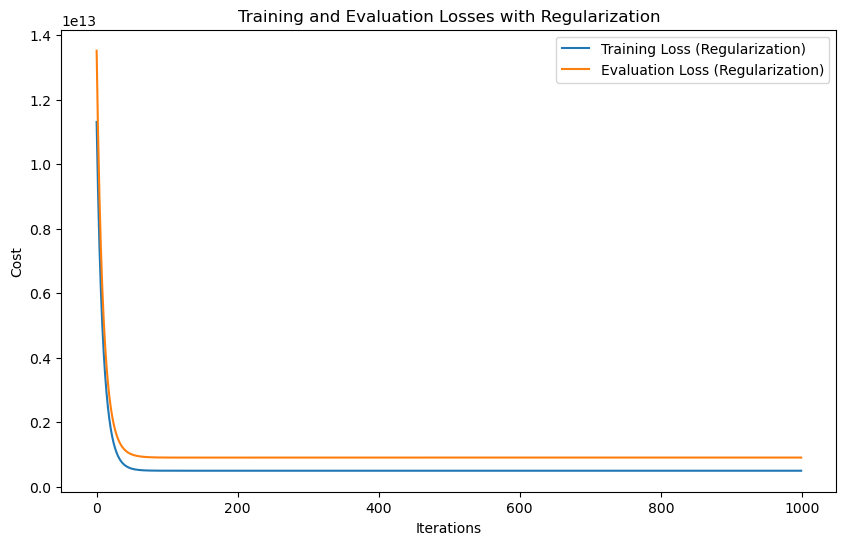

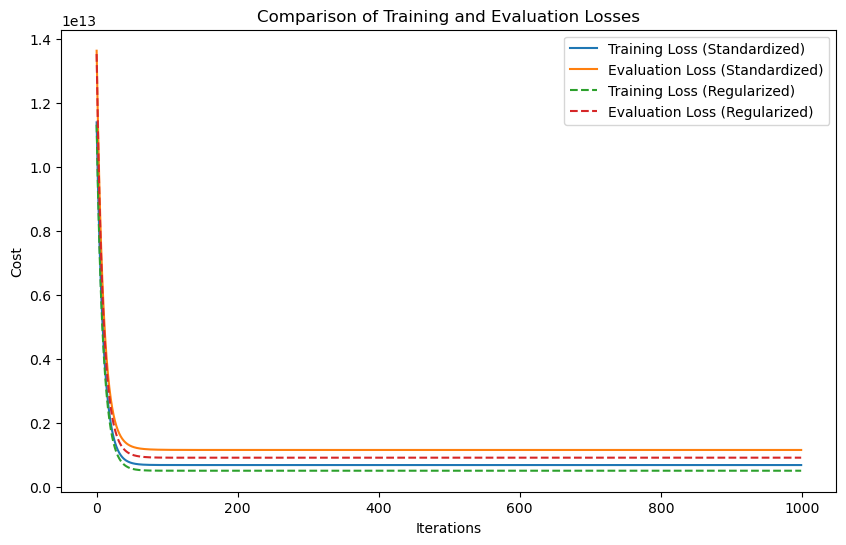

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('Housing.csv')

features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
target = 'price'

data['mainroad'] = data['mainroad'].map({'yes': 1, 'no': 0})
data['guestroom'] = data['guestroom'].map({'yes': 1, 'no': 0})
data['basement'] = data['basement'].map({'yes': 1, 'no': 0})
data['hotwaterheating'] = data['hotwaterheating'].map({'yes': 1, 'no': 0})
data['airconditioning'] = data['airconditioning'].map({'yes': 1, 'no': 0})
data['prefarea'] = data['prefarea'].map({'yes': 1, 'no': 0})

X = data[features].values
y = data[target].values

X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_eval_scaled = scaler.transform(X_eval)

X_train_scaled = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_eval_scaled = np.c_[np.ones(X_eval_scaled.shape[0]), X_eval_scaled]

def hypothesis(theta, X):
    return np.dot(X, theta)

def cost_function_reg(theta, X, y, lambda_):
    m = len(y)
    regularization = (lambda_ / (2 * m)) * np.sum(theta[1:] ** 2)
    return (1/(2*m)) * np.sum((hypothesis(theta, X) - y) ** 2) + regularization

def gradient_descent_reg(X_train, y_train, X_eval, y_eval, theta, learning_rate, iterations, lambda_):
    m_train = len(y_train)
    cost_history_train = []
    cost_history_eval = []
    
    for i in range(iterations):
        gradients = (1/m_train) * np.dot(X_train.T, (hypothesis(theta, X_train) - y_train))
        gradients[1:] = gradients[1:] + (lambda_ / m_train) * theta[1:]
        theta = theta - learning_rate * gradients
        
        cost_train = cost_function_reg(theta, X_train, y_train, lambda_)
        cost_eval = cost_function_reg(theta, X_eval, y_eval, lambda_)
        
        cost_history_train.append(cost_train)
        cost_history_eval.append(cost_eval)
        
        if i % 100 == 0:
            print(f"Iteration {i}: Training cost = {cost_train}, Evaluation cost = {cost_eval}")
    
    return theta, cost_history_train, cost_history_eval

theta_init = np.zeros(X_train_scaled.shape[1])
learning_rate = 0.05
iterations = 1000
lambda_ = 1

theta_reg, cost_history_train_reg, cost_history_eval_reg = gradient_descent_reg(X_train_scaled, y_train, X_eval_scaled, y_eval, theta_init, learning_rate, iterations, lambda_)

print(f"The best parameters (theta) found are: {theta_reg}")

plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history_train_reg, label='Training Loss (Regularization)')
plt.plot(range(iterations), cost_history_eval_reg, label='Evaluation Loss (Regularization)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training and Evaluation Losses with Regularization')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(len(cost_history_train_std)), cost_history_train_std, label='Training Loss (Standardized)')
plt.plot(range(len(cost_history_eval_std)), cost_history_eval_std, label='Evaluation Loss (Standardized)')
plt.plot(range(len(cost_history_train_reg)), cost_history_train_reg, label='Training Loss (Regularized)', linestyle='--')
plt.plot(range(len(cost_history_eval_reg)), cost_history_eval_reg, label='Evaluation Loss (Regularized)', linestyle='--')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Comparison of Training and Evaluation Losses')
plt.legend()
plt.show()


In [ ]:
PROBLEM 3B

Iteration 0: Training cost = 11314618605726.264, Evaluation cost = 13523928373617.172
Iteration 100: Training cost = 498048823187.95416, Evaluation cost = 901185710751.7473
Iteration 200: Training cost = 497440163395.70013, Evaluation cost = 900434081725.2474
Iteration 300: Training cost = 497436786800.7466, Evaluation cost = 900664222221.1439
Iteration 400: Training cost = 497436727608.0818, Evaluation cost = 900688184569.6471
Iteration 500: Training cost = 497436726520.9811, Evaluation cost = 900690954588.845
Iteration 600: Training cost = 497436726500.9127, Evaluation cost = 900691306810.5457
Iteration 700: Training cost = 497436726500.5421, Evaluation cost = 900691353520.8333
Iteration 800: Training cost = 497436726500.5352, Evaluation cost = 900691359814.3154
Iteration 900: Training cost = 497436726500.5351, Evaluation cost = 900691360667.0833
Iteration 0: Training cost = 11314605028516.473, Evaluation cost = 13523928373617.172
Iteration 100: Training cost = 496860261343.7942, Eva

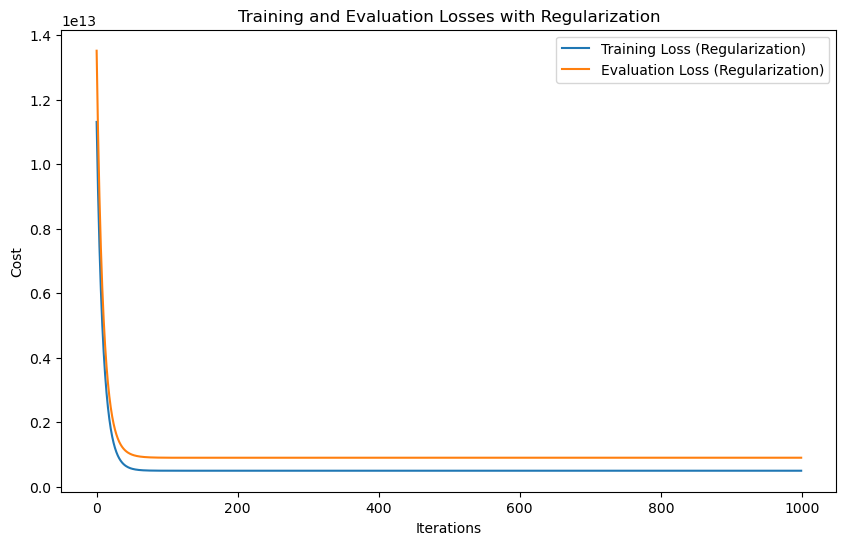

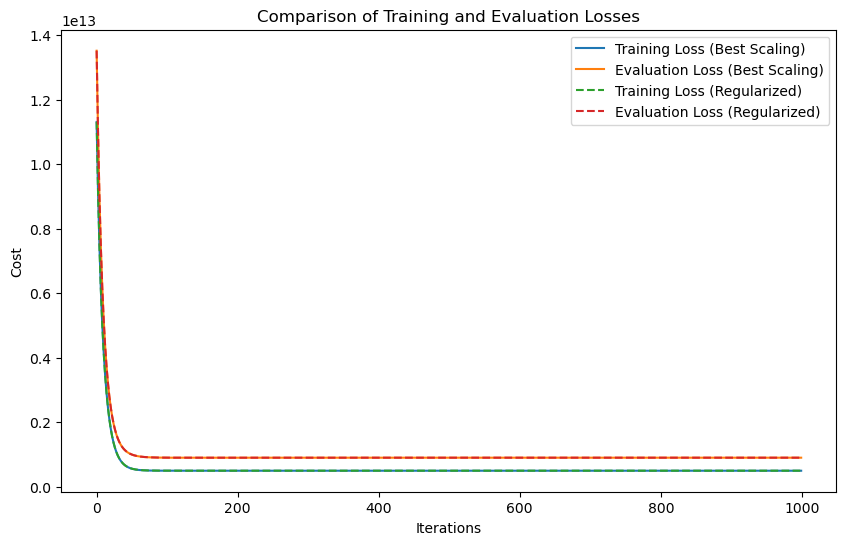

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

data = pd.read_csv('Housing.csv')

features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
target = 'price'

data['mainroad'] = data['mainroad'].map({'yes': 1, 'no': 0})
data['guestroom'] = data['guestroom'].map({'yes': 1, 'no': 0})
data['basement'] = data['basement'].map({'yes': 1, 'no': 0})
data['hotwaterheating'] = data['hotwaterheating'].map({'yes': 1, 'no': 0})
data['airconditioning'] = data['airconditioning'].map({'yes': 1, 'no': 0})
data['prefarea'] = data['prefarea'].map({'yes': 1, 'no': 0})

X = data[features].values
y = data[target].values

X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_eval_scaled = scaler.transform(X_eval)

X_train_scaled = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_eval_scaled = np.c_[np.ones(X_eval_scaled.shape[0]), X_eval_scaled]

def hypothesis(theta, X):
    return np.dot(X, theta)

def cost_function_reg(theta, X, y, lambda_):
    m = len(y)
    regularization = (lambda_ / (2 * m)) * np.sum(theta[1:] ** 2)
    return (1/(2*m)) * np.sum((hypothesis(theta, X) - y) ** 2) + regularization

def cost_function(theta, X, y):
    m = len(y)
    return (1/(2*m)) * np.sum((hypothesis(theta, X) - y) ** 2)

def gradient_descent_reg(X_train, y_train, X_eval, y_eval, theta, learning_rate, iterations, lambda_):
    m_train = len(y_train)
    cost_history_train = []
    cost_history_eval = []
    
    for i in range(iterations):
        gradients = (1/m_train) * np.dot(X_train.T, (hypothesis(theta, X_train) - y_train))
        gradients[1:] = gradients[1:] + (lambda_ / m_train) * theta[1:]
        theta = theta - learning_rate * gradients
        
        cost_train = cost_function_reg(theta, X_train, y_train, lambda_)
        cost_eval = cost_function(theta, X_eval, y_eval)
        
        cost_history_train.append(cost_train)
        cost_history_eval.append(cost_eval)
        
        if i % 100 == 0:
            print(f"Iteration {i}: Training cost = {cost_train}, Evaluation cost = {cost_eval}")
    
    return theta, cost_history_train, cost_history_eval

def gradient_descent(X_train, y_train, X_eval, y_eval, theta, learning_rate, iterations):
    m_train = len(y_train)
    cost_history_train = []
    cost_history_eval = []
    
    for i in range(iterations):
        gradients = (1/m_train) * np.dot(X_train.T, (hypothesis(theta, X_train) - y_train))
        theta = theta - learning_rate * gradients
        
        cost_train = cost_function(theta, X_train, y_train)
        cost_eval = cost_function(theta, X_eval, y_eval)
        
        cost_history_train.append(cost_train)
        cost_history_eval.append(cost_eval)
        
        if i % 100 == 0:
            print(f"Iteration {i}: Training cost = {cost_train}, Evaluation cost = {cost_eval}")
    
    return theta, cost_history_train, cost_history_eval

theta_init = np.zeros(X_train_scaled.shape[1])
learning_rate = 0.05
iterations = 1000
lambda_ = 1

theta_reg, cost_history_train_reg, cost_history_eval_reg = gradient_descent_reg(X_train_scaled, y_train, X_eval_scaled, y_eval, theta_init, learning_rate, iterations, lambda_)

theta_best, cost_history_train_best, cost_history_eval_best = gradient_descent(X_train_scaled, y_train, X_eval_scaled, y_eval, theta_init, learning_rate, iterations)

print(f"The best parameters (theta) found with regularization are: {theta_reg}")

plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history_train_reg, label='Training Loss (Regularization)')
plt.plot(range(iterations), cost_history_eval_reg, label='Evaluation Loss (Regularization)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training and Evaluation Losses with Regularization')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(len(cost_history_train_best)), cost_history_train_best, label='Training Loss (Best Scaling)')
plt.plot(range(len(cost_history_eval_best)), cost_history_eval_best, label='Evaluation Loss (Best Scaling)')
plt.plot(range(len(cost_history_train_reg)), cost_history_train_reg, label='Training Loss (Regularized)', linestyle='--')
plt.plot(range(len(cost_history_eval_reg)), cost_history_eval_reg, label='Evaluation Loss (Regularized)', linestyle='--')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Comparison of Training and Evaluation Losses')
plt.legend()
plt.show()
